In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [9]:
symbol = "AAPL"
start = "2010-01-01"
end = "2025-01-01"

df = yf.download(symbol, start=start, end=end)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455076,6.391278,6.422876,493729600
2010-01-05,6.451467,6.487880,6.417460,6.458087,601904800
2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000
2010-01-07,6.337109,6.379842,6.291066,6.372319,477131200
2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800


In [10]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-24,257.916443,257.926411,255.009620,255.209412,23234700
2024-12-26,258.735504,259.814335,257.347047,257.906429,27237100
2024-12-27,255.309296,258.415896,252.782075,257.546826,42355300
2024-12-30,251.923019,253.221595,250.474615,251.952985,35557500
2024-12-31,250.144974,253.001833,249.156056,252.162760,39480700


In [11]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440331,6.455076,6.391278,6.422876,493729600
1,2010-01-05,6.451467,6.487880,6.417460,6.458087,601904800
2,2010-01-06,6.348846,6.477045,6.342226,6.451466,552160000
3,2010-01-07,6.337109,6.379842,6.291066,6.372319,477131200
4,2010-01-08,6.379240,6.379842,6.291368,6.328683,447610800


In [12]:
df = df[['Close', 'High', 'Low', 'Open', 'Volume']]
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455076,6.391278,6.422876,493729600
1,6.451467,6.487880,6.417460,6.458087,601904800
2,6.348846,6.477045,6.342226,6.451466,552160000
3,6.337109,6.379842,6.291066,6.372319,477131200
4,6.379240,6.379842,6.291368,6.328683,447610800


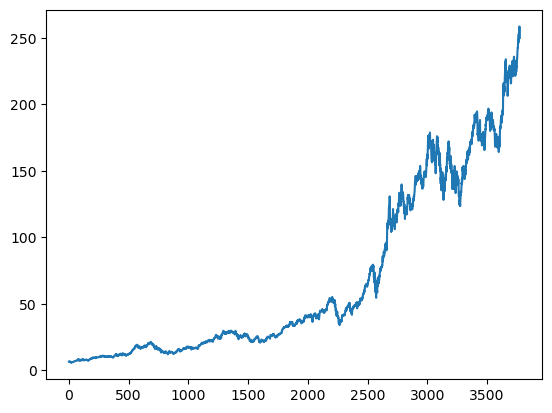

In [13]:
plt.plot(df.Close)

In [14]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455076,6.391278,6.422876,493729600
1,6.451467,6.487880,6.417460,6.458087,601904800
2,6.348846,6.477045,6.342226,6.451466,552160000
3,6.337109,6.379842,6.291066,6.372319,477131200
4,6.379240,6.379842,6.291368,6.328683,447610800
...,...,...,...,...,...
3769,257.916443,257.926411,255.009620,255.209412,23234700
3770,258.735504,259.814335,257.347047,257.906429,27237100
3771,255.309296,258.415896,252.782075,257.546826,42355300


In [15]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3769,229.357535
3770,229.859200
3771,230.346935
3772,230.774993


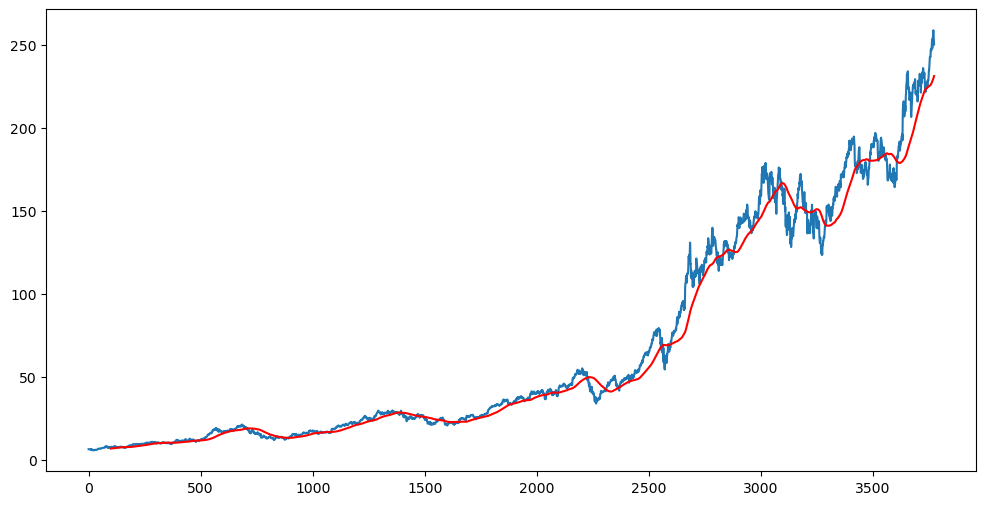

In [16]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [17]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3769,211.182570
3770,211.614168
3771,212.039086
3772,212.437766


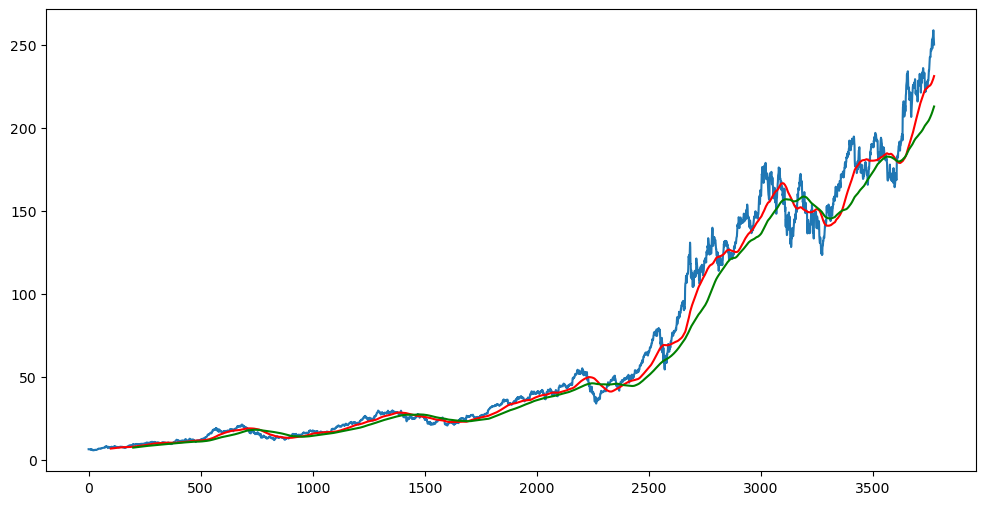

In [18]:
plt.figure(figsize =(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [19]:
df.shape

(3774, 5)

In [20]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2641, 1)
(1133, 1)


In [21]:
data_training.head()

Ticker,AAPL
0,6.440331
1,6.451467
2,6.348846
3,6.337109
4,6.379240


In [22]:
data_testing.head()

Ticker,AAPL
2641,88.601044
2642,88.601044
2643,90.971138
2644,90.688873
2645,92.801025


In [23]:
print(data_training)

Ticker       AAPL
0        6.440331
1        6.451467
2        6.348846
3        6.337109
4        6.379240
...           ...
2636    87.615555
2637    88.778702
2638    86.050896
2639    88.034073
2640    88.768944

[2641 rows x 1 columns]


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
print(data_training_array)

[[0.00792292]
 [0.00805643]
 [0.00682613]
 ...
 [0.96236637]
 [0.98614249]
 [0.99495279]]


In [27]:
data_training_array.shape

(2641, 1)

In [29]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
x_train.shape

(2541, 100, 1)

In [32]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [35]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 50, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        26,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 108,411 (423.48 KB)

 Trainable params: 108,411 (423.48 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - loss: 0.0026
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0021
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0023
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0024
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0024
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0024
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0020
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0025
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0022
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0025
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0022
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0024
Epoch 13/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0022
Epoch 14/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0024
Epoch 15/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0021
Epoc

In [41]:
model.save('keras_model.h5')

In [43]:
data_testing.head()

Ticker,AAPL
2641,88.601044
2642,88.601044
2643,90.971138
2644,90.688873
2645,92.801025


In [44]:
past_100_days = data_training.tail(100)

In [46]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [48]:
final_df.head()

Ticker,AAPL
0,77.664574
1,78.033424
2,77.562660
3,79.404564
4,78.839134


In [50]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.11363837],
       [0.11544393],
       [0.11313949],
       ...,
       [0.98322834],
       [0.96665216],
       [0.95794843]])

In [51]:
input_data.shape

(1233, 1)

In [53]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [54]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1133, 100, 1)
(1133,)


In [68]:
y_predicted = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [69]:
y_predicted.shape

(1133, 1)

In [70]:
y_test

array([0.16717356, 0.16717356, 0.17877543, ..., 0.98322834, 0.96665216,
       0.95794843])

In [71]:
y_predicted

array([[0.18146376],
       [0.18304726],
       [0.18445405],
       ...,
       [0.8830993 ],
       [0.88618445],
       [0.8883486 ]], dtype=float32)

In [72]:
scaler.scale_

array([0.00489511])

In [73]:
scale_factor = 1/0.00489511
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

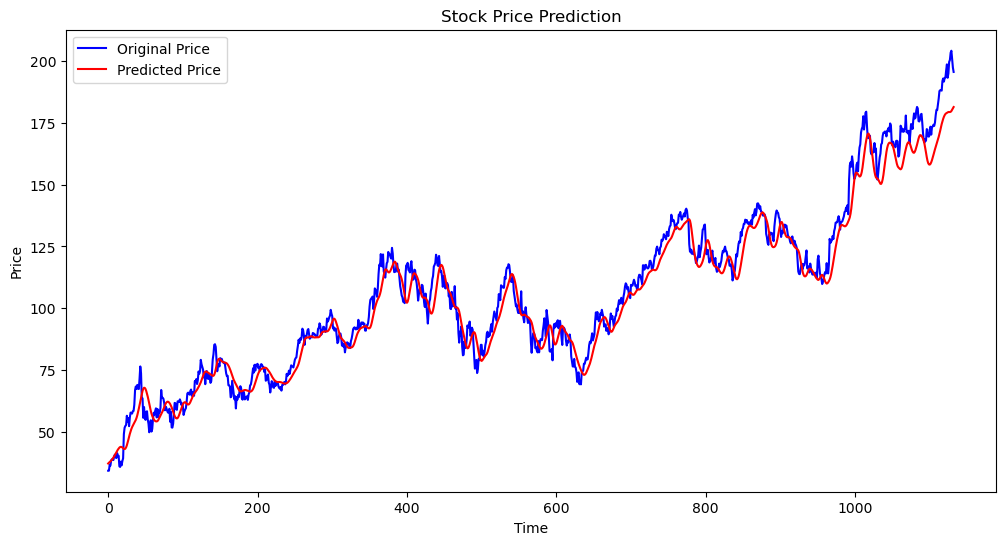

In [75]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')  
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Stock Price Prediction")
plt.legend() 
plt.show()

In [ ]:
conda install -c conda-forge streamlit

Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.1.1


WARNING conda.models.version:get_matcher(556): Using .* with relational operator is superfluous and deprecated and will be removed in a future version of conda. Your spec was 1.9.0.*, but conda is ignoring the .* and treating it as 1.9.0
done
Solving environment: | 